<a href="https://colab.research.google.com/github/Varunrao123/EVA_Assignments/blob/master/Ass_4/4th_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add,BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


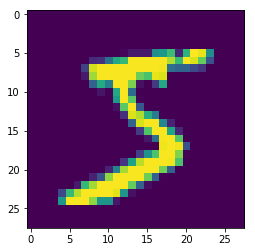

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [6]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)


In [8]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [27]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(10, (3, 3), activation='relu', input_shape=(28,28,1))) # 26
model.add(BatchNormalization())

model.add(Convolution2D(16, (3, 3), activation='relu')) # 24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) #12

model.add(Convolution2D(10, (1, 1), activation='relu')) #12
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, (3, 3), activation='relu')) # 10
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(16, (3, 3), activation='relu')) #8
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(10, (3, 3), activation='relu')) # 6
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 6, 6)) # 6
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (6, 6))`


In [28]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_43 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_44 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_37 (Dropout)         (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 12, 12, 10)        170       
__________

In [29]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.009 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.009), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=30, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30

Epoch 00001: LearningRateScheduler setting learning rate to 0.009.
60000/60000 [==============================] - 11s 185us/step - loss: 0.3795 - acc: 0.8853 - val_loss: 0.0718 - val_acc: 0.9794
Epoch 2/30

Epoch 00002: LearningRateScheduler setting learning rate to 0.006823351.
60000/60000 [==============================] - 6s 108us/step - loss: 0.1782 - acc: 0.9380 - val_loss: 0.0413 - val_acc: 0.9877
Epoch 3/30

Epoch 00003: LearningRateScheduler setting learning rate to 0.0054945055.
60000/60000 [==============================] - 6s 107us/step - loss: 0.1421 - acc: 0.9466 - val_loss: 0.0366 - val_acc: 0.9884
Epoch 4/30

Epoch 00004: LearningRateScheduler setting learning rate to 0.0045988758.
60000/60000 [==============================] - 6s 107us/step - loss: 0.1287 - acc: 0.9484 - val_loss: 0.0281 - val_acc: 0.9913
Epoch 5/30

Epoch 00005: LearningRateScheduler setting learning rate to 0.0039543058.
60000/60000 [======

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [31]:
print(score)

[0.017829841956490417, 0.9952]
